In [1]:
#모듈
import pandas as pd
import numpy as np

#선형회귀 라이브러리의 선형회귀분석 모듈 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#시각화 그래프 모듈
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 사용하기 위한 모듈
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import matplotlib
fm.get_fontconfig_fonts()
#font_location = './data/malgun.ttf' # For Windows
font_location = 'C:/Windows/Fonts/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
#데이터 호출 및 강남구 지정
df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', index_col='년도')
df.info()
df = df[df['지역']=='강남구']
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 2014 to 2018
Data columns (total 19 columns):
지역            125 non-null object
강도            125 non-null int64
살인            125 non-null int64
절도            125 non-null int64
폭력            125 non-null int64
강간강제추행        125 non-null int64
살인강간          125 non-null int64
강도절도폭력        125 non-null int64
범죄합계          125 non-null int64
10만명당범죄수      125 non-null int64
한국인           125 non-null int64
등록외국인         125 non-null int64
세대            125 non-null int64
인구합계          125 non-null int64
CCTV          125 non-null int64
10만명당CCTV수    125 non-null int64
단란주점          125 non-null int64
유흥주점          125 non-null int64
단란유흥          125 non-null int64
dtypes: int64(18), object(1)
memory usage: 19.5+ KB


,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
년도,,,,,,,,,,,,,,,,,,,
2014,강남구,37,13,3895,4394,512,525,8326,8851,1534,571509,5359,234324,576868,430,74,328,276,604
2015,강남구,21,13,3850,4284,449,462,8155,8617,1480,576881,5325,237556,582206,976,167,313,269,582
2016,강남구,39,5,3587,4002,516,521,7628,8149,1415,570512,5084,235329,575597,1741,302,301,255,556
2017,강남구,20,7,3130,3956,607,614,7106,7720,1362,561497,4929,233311,566427,2318,409,287,233,520
2018,강남구,14,10,3004,3885,600,610,6903,7513,1362,546637,4978,229509,551615,2766,501,266,211,477


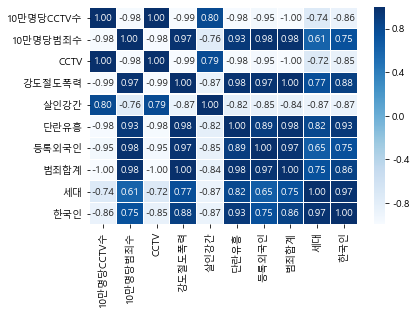

In [3]:
df_corr  = df[['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강도절도폭력','살인강간' , '단란유흥',
     '등록외국인', '범죄합계', '세대', '한국인']].corr()
hm = sns.heatmap(data = df_corr, annot=True, 
fmt = '.2f', linewidths=.1, cmap='Blues')
hm.set_ylim(10.0,0.0)
plt.savefig('./data/seoul_강남구_corr_pic.png')

train data  개수 : 3
test data  개수 : 2
예측 스코어: 0.85
기울기 a: [ 0.0543543   0.02309421 -0.49072399  0.00675566]
절편 b : 4895.856264362219
[8851.         8617.         8184.86950689 7831.56316941 7513.        ]



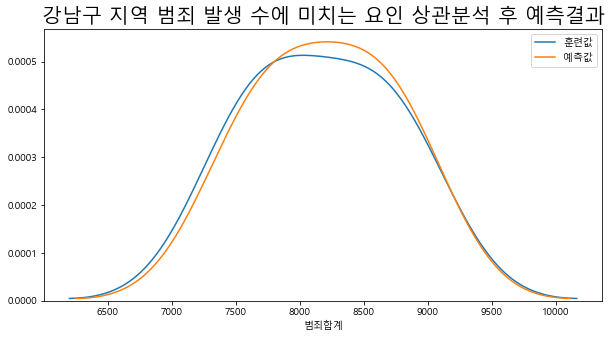

In [5]:
#독립변수
X= df[['등록외국인','단란유흥','CCTV','한국인']] #'등록외국인','단란유흥','CCTV','한국인' 을 통한 예측
#종속변수
Y= df['범죄합계']    

# train data 와 test data를 7:3 비율로 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤하게 추출 -> 값 10
print('train data  개수 :', len(X_train))
print('test data  개수 :', len(X_test))

#단순 선형회귀분석 객체 생성
lr = LinearRegression()

#학습
lr.fit(X_train, Y_train)

#학습 후 결정계수 계산
r_square = lr.score(X_test, Y_test)
print("예측 스코어: %.2f" % (r_square)) 

#기울기
print("기울기 a: {0}" .format(lr.coef_)) #

#절편
print('절편 b : {0}' .format( lr.intercept_)) #

#예측값 구하기
y_predict = lr.predict(X) # 독립변수(X)에 대한 예측된 종속변수값
print(y_predict)
print()

#실제 테스트 결과 값(Y)과 예측 결과값(y_predict)
#결과값이 떨어지는 것으로 보아 연비에 영향을 미치는 다른 변수가 있다.
plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist = False, label = '훈련값')
ax2 = sns.distplot(y_predict, hist = False , label = '예측값', ax=ax1)
plt.title("강남구 지역 범죄 발생 수에 미치는 요인 상관분석 후 예측결과" ,fontsize=20)

#이미지파일로 저장
plt.savefig('./data/seoul_predict/강남구 지역 범죄 발생 수에 미치는 요인 상관분석 후 예측결과.png')

#plt.show()


In [12]:
dataset = X.values
dataset

array([[  5359,    604,    430, 571509],
       [  5325,    582,    976, 576881],
       [  5084,    556,   1741, 570512],
       [  4929,    520,   2318, 561497],
       [  4978,    477,   2766, 546637]], dtype=int64)